# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd



import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [196]:
import random

def roll_dice (times, maxD):
    resultL = [random.randint(1, maxD) for x in range(times)]
    df_dices = pd.DataFrame(resultL, columns = ['Dice']) 
    return df_dices


dframe=roll_dice(10,10)
dframe.head()

,Dice
0,1
1,10
2,10
3,7
4,10


#### 2.- Plot the results sorted by value.

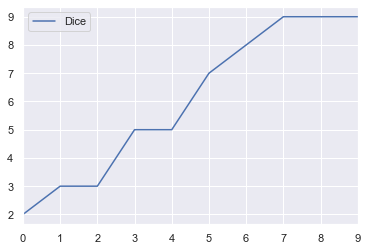

In [115]:
# your code here
dframe=dframe.sort_values(by='Dice').reset_index(drop=True)
dframe.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

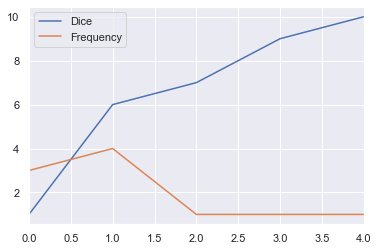

In [195]:
# your code here

dframe['Frequency']=1
dframe_freq = dframe.groupby('Dice', as_index=False).agg({'Frequency':'count'})
dframe_freq.plot()

In [ ]:
"""
your comments here
"""

# in the first one ("Dice"), you see the cummulative frequency
# in the second one ("Frequency"), you see the frequency of each dice

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [199]:
# your code here
import random

def roll_dice (times, maxD):
    resultL = [random.randint(1, maxD) for x in range(times)]
    df_dices = pd.DataFrame(resultL, columns = ['Dice']) 
    return df_dices


dframe=roll_dice(10,10)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [206]:
# your code here
dframe['Frequency'] =1

dframe_freq = dframe.groupby('Dice', as_index=False).agg({'Frequency':'count'})

dframe_freq['weight'] = dframe_freq['Dice'] *dframe_freq['Frequency']

mean = (dframe_freq['weight'].sum())/int(dframe.shape[0])
print(mean)

dframe.mean() ## just to check



4.1


Dice         4.1
Frequency    1.0
dtype: float64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [102]:
# your code here
def calculate_median (df):
    length = df.shape[0]
    df= df.sort_values(df.columns[0]).reset_index(drop=True)
    if length %2==0:
        ind1 = int(length/2)
        ind2 = int(length/2+1)
        median = (df.loc[ind1] + df.loc[ind2])/2
    else:
        ind = int(length/2 + 0.5)
        median = df.loc[ind]
    return float(median)

dframe=roll_dice(10,10)
calculate_median(dframe)

7.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [101]:
# your code here

def calculate_quantile (df):
    length = df.shape[0]
    df= df.sort_values(df.columns[0]).reset_index(drop=True)
    if length %4==0:
        iq25_1 = int(length/4)
        iq25_2 = int(length/4+1)
        iq75_1 = int(length/4)
        iq75_2 = int(length/4+1)
        q25 = (df.loc[iq25_1] + df.loc[iq25_2])/2
        q75 = (df.loc[iq75_1] + df.loc[iq75_2])/2
    else:
        iq25 = int(length/4 + 0.5)
        iq75 = int(length/4*3 + 0.5)
        q25 = df.loc[iq25]
        q75 = df.loc[iq75]
    return float(q25), float(q75)

calculate_quantile(dframe)

(3.0, 7.0)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

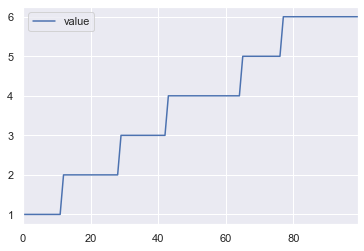

In [149]:
# your code here
path = "C:/Users/haenni/Documents/GitHub/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv"
dice_hundred = pd.read_csv(path,index_col=0)

dice_hundred = dice_hundred.sort_values(by="value").reset_index(drop=True)
dice_hundred.head()
dice_hundred.plot(y='value', use_index=True)

In [ ]:
"""
your comments here
"""
# cummulative density --> most of the values are 4 / 6

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [207]:
# your code here   -->> Just as remark!! In Challenge 2 we were not asked to define a function for a mean! only to calculate the mean....

def calculate_mean(df):
    df['Frequency'] =1
    df_freq = df.groupby(df.columns[0], as_index=False).agg({'Frequency':'count'})

    df_freq['weight'] = df_freq[df.columns[0]] *df_freq['Frequency']

    mean = df_freq['weight'].sum()/int(df.shape[0])
   
    return mean



In [209]:
dice_hundred2 = dice_hundred.drop('roll', axis=1)

dice_hundred2.head()
print(calculate_mean(dice_hundred2))
dice_hundred.mean() # just to checkj

3.74


roll     49.50
value     3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [213]:
# your code here
dice_hundred['Frequency']=1
f_freq = dice_hundred.groupby('value', as_index=False).agg({'Frequency':'count'})
f_freq 

,value,Frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

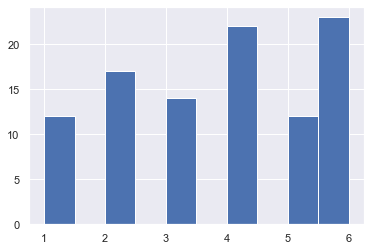

In [223]:
# your code here
plt.hist(x='value',  data=dice_hundred)

In [ ]:
"""
your comments here
"""

## no shape recocnized, except that it is slightly right shaped ---> thats also the reason why the mean is slightly above 3.5 

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([175.,   0., 167.,   0., 175.,   0., 168.,   0., 149., 166.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

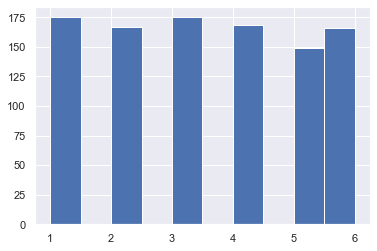

In [228]:
# your code here

path = "C:/Users/haenni/Documents/GitHub/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv"
dice_thousand = pd.read_csv(path, index_col=0)


plt.hist(x='value',  data=dice_thousand)

In [ ]:
"""
your comments here
"""

## its more equally distributed among the values.... law of large numbers? s

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <a list of 10 Patch objects>)

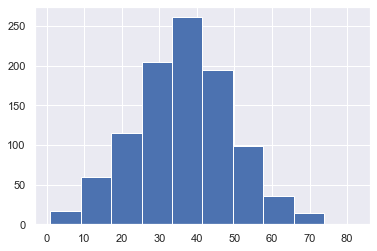

In [257]:
# your code here

path1 = "C:/Users/haenni/Documents/GitHub/lab-understanding-descriptive-stats/data/ages_population.csv"

path2 = "C:/Users/haenni/Documents/GitHub/lab-understanding-descriptive-stats/data/ages_population2.csv"

path3 = "C:/Users/haenni/Documents/GitHub/lab-understanding-descriptive-stats/data/ages_population3.csv"

pop1 = pd.read_csv(path1)
pop2 = pd.read_csv(path2)
pop3 = pd.read_csv(path3)


pop1['observation'] = pop1['observation'].astype(float)
pop1['Frequency']=1
pop1_freq = pop1.groupby('observation', as_index=False).agg({'Frequency':'count'})


plt.hist(x='observation',  data=pop1)


In [255]:
## guess for Meand: around 49, guess for std: 20

,Frequency
observation,
68.0,1
12.0,1
45.0,1
38.0,1
49.0,1


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [274]:
"""
your comments here
"""
print(pop1.mean())
pop1.std()


observation    36.56
Frequency       1.00
dtype: float64


12.81008977329979

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <a list of 10 Patch objects>)

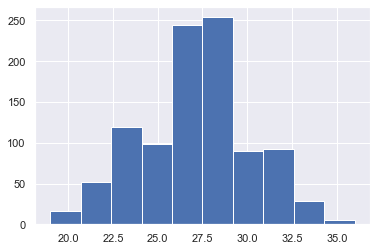

In [268]:
# your code here
pop2 = pd.read_csv(path2)

pop2['observation'] = pop2['observation'].astype(float)
pop2['Frequency']=1
pop2_freq = pop2.groupby('observation', as_index=False).agg({'Frequency':'count'})


plt.hist(x='observation',  data=pop2)


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [269]:
"""
your comments here
"""
## no older than 35? yes, thats true --> mean btw. 25 and 30, people around the average --> std. smaller

pop2.max()

observation    36.0
Frequency       1.0
dtype: float64

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here
print(pop2.mean())
pop2.std()

In [270]:
"""
your comments here
"""
## true..... smaller std and average around 27, because not that mayn old ones

observation    27.155
Frequency       1.000
dtype: float64


2.9683286543103704

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <a list of 10 Patch objects>)

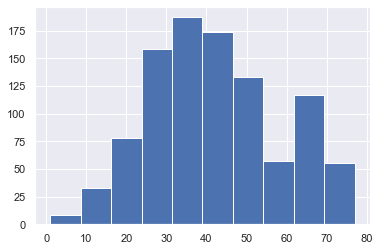

In [271]:
# your code here
pop3 = pd.read_csv(path3)

pop3['observation'] = pop3['observation'].astype(float)
pop3['Frequency']=1
pop3_freq = pop3.groupby('observation', as_index=False).agg({'Frequency':'count'})


plt.hist(x='observation',  data=pop3)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [275]:
# your code here

print(pop3.mean())
pop3.std()

observation    41.989
Frequency       1.000
dtype: float64


observation    16.144706
Frequency       0.000000
dtype: float64

In [ ]:
"""
your comments here
"""
## we have more older people close to 70 years old
## therefore the average is higher, and also the std


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [279]:
# your code here
np.percentile(pop3['observation'],[0, 25, 50, 75, 100])
              

array([ 1., 30., 40., 53., 77.])

In [280]:
"""
your comments here
"""
## median is 40, that is smaller than the average, what indicates, that the distribution is right shaped, means more older people

observation    40.0
Frequency       1.0
dtype: float64

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [282]:
# your code here

np.percentile(pop3['observation'],[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

array([ 1., 22., 28., 32., 36., 40., 45., 50., 57., 67., 77.])

In [ ]:
"""
your comments here
"""
## its no added value, its the same as in the histogramm... but i cant think about another percentiling, that could help....

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""